In [178]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [111]:
def single_match_stats(stat):
    a = []
    for elem in stat:
        a.append(elem.text)
    return np.array(a)

def open_stats(links):
    b = np.empty((0,17), int)
    for elem in links:
        link = elem.get('href')
        url = link
        result = elem.text
        response = requests.get(url)
        tree = BeautifulSoup(response.content, 'html.parser')
        stat = tree.find_all('span', {'class': 'statistics-info-bar__stat'})
        b = np.vstack([b, np.concatenate((single_match_stats(stat), np.array([result])))])
    return b

c = np.empty((0,17), int)

for i in ['8', '9', '10', '11', '12', '1', '2', '3', '4', '5']:
    url = f'https://www.sports.ru/epl/calendar/?s=8672&m=' + i
    resp_links = requests.get(url)
    tree_links = BeautifulSoup(resp_links.content, 'html.parser')
    links = tree_links.find_all('a', {'class': 'score'})
    c = np.vstack([c, open_stats(links)])
    
print(c)

[['36%' '64%' '8' ... '1' '1' '2 : 0']
 ['49%' '51%' '13' ... '2' '3' '5 : 1']
 ['36%' '64%' '11' ... '1' '0' '1 : 2']
 ...
 ['73%' '27%' '17' ... '2' '0' '5 : 1']
 ['49%' '51%' '12' ... '0' '2' '1 : 2']
 ['71%' '29%' '14' ... '0' '2' '2 : 1']]


In [112]:
c.shape

(380, 17)

In [161]:
data = pd.DataFrame(c)

In [162]:
data.columns = ['Владение1', 'Владение2', 'Удары по воротам1', 'Удары по воротам2','Удары в створ1', 'Удары в створ2',
                           'Удары мимо1', 'Удары мимо2','Фолы1', 'Фолы2',
                           'Угловые удары1', 'Угловые удары2', 'Штрафные удары1', 'Штрафные удары2', 'Вне игры1', 'Вне игры2', 'Результат']

In [163]:
spisok1 = []
for elem in data['Результат'].values:
    spisok1.append(elem[0])
spisok2 = []
for elem in data['Результат'].values:
    spisok2.append(elem[4])
data['Голы1'] = spisok1
data['Голы2'] = spisok2
data = data.drop('Результат', axis = 1)

In [164]:
spisok3 = []
spisok4 = []
for elem in data['Владение1'].values:
    spisok3.append(elem[:2])
for elem in data['Владение2'].values:
    spisok4.append(elem[:2])
data['Владение1'] = spisok3
data['Владение2'] = spisok4
data

,Владение1,Владение2,Удары по воротам1,Удары по воротам2,Удары в створ1,Удары в створ2,Удары мимо1,Удары мимо2,Фолы1,Фолы2,Угловые удары1,Угловые удары2,Штрафные удары1,Штрафные удары2,Вне игры1,Вне игры2,Голы1,Голы2
0,36,64,8,18,3,4,5,14,12,8,2,5,7,12,1,1,2,0
1,49,51,13,9,8,3,5,6,11,9,5,4,9,10,2,3,5,1
2,36,64,11,12,3,8,8,4,10,7,7,6,7,10,1,0,1,2
3,61,39,11,3,6,1,5,2,15,11,5,2,11,14,0,1,3,0
4,38,62,11,8,7,2,4,6,18,13,2,4,13,18,0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,71,29,15,3,5,2,10,1,5,11,13,1,11,5,1,2,3,2
376,50,50,11,4,7,2,4,2,9,9,5,6,9,8,0,0,3,1
377,73,27,17,5,9,2,8,3,8,9,12,2,7,8,2,0,5,1
378,49,51,12,12,5,6,7,6,11,13,3,2,13,9,0,2,1,2


In [166]:
data = data.astype(int)
data

,Владение1,Владение2,Удары по воротам1,Удары по воротам2,Удары в створ1,Удары в створ2,Удары мимо1,Удары мимо2,Фолы1,Фолы2,Угловые удары1,Угловые удары2,Штрафные удары1,Штрафные удары2,Вне игры1,Вне игры2,Голы1,Голы2
0,36,64,8,18,3,4,5,14,12,8,2,5,7,12,1,1,2,0
1,49,51,13,9,8,3,5,6,11,9,5,4,9,10,2,3,5,1
2,36,64,11,12,3,8,8,4,10,7,7,6,7,10,1,0,1,2
3,61,39,11,3,6,1,5,2,15,11,5,2,11,14,0,1,3,0
4,38,62,11,8,7,2,4,6,18,13,2,4,13,18,0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,71,29,15,3,5,2,10,1,5,11,13,1,11,5,1,2,3,2
376,50,50,11,4,7,2,4,2,9,9,5,6,9,8,0,0,3,1
377,73,27,17,5,9,2,8,3,8,9,12,2,7,8,2,0,5,1
378,49,51,12,12,5,6,7,6,11,13,3,2,13,9,0,2,1,2


In [169]:
spisok = []
for i in range(len(data['Голы1'])):
    if data['Голы1'].values[i] > data['Голы2'].values[i]:
        spisok.append(1)
    elif data['Голы1'].values[i] < data['Голы2'].values[i]:
        spisok.append(2)
    else:
        spisok.append(0)
data['Результат'] = spisok
data

,Владение1,Владение2,Удары по воротам1,Удары по воротам2,Удары в створ1,Удары в створ2,Удары мимо1,Удары мимо2,Фолы1,Фолы2,Угловые удары1,Угловые удары2,Штрафные удары1,Штрафные удары2,Вне игры1,Вне игры2,Голы1,Голы2,Результат
0,36,64,8,18,3,4,5,14,12,8,2,5,7,12,1,1,2,0,1
1,49,51,13,9,8,3,5,6,11,9,5,4,9,10,2,3,5,1,1
2,36,64,11,12,3,8,8,4,10,7,7,6,7,10,1,0,1,2,2
3,61,39,11,3,6,1,5,2,15,11,5,2,11,14,0,1,3,0,1
4,38,62,11,8,7,2,4,6,18,13,2,4,13,18,0,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,71,29,15,3,5,2,10,1,5,11,13,1,11,5,1,2,3,2,1
376,50,50,11,4,7,2,4,2,9,9,5,6,9,8,0,0,3,1,1
377,73,27,17,5,9,2,8,3,8,9,12,2,7,8,2,0,5,1,1
378,49,51,12,12,5,6,7,6,11,13,3,2,13,9,0,2,1,2,2


In [174]:
y = data['Результат']
X = data.drop(['Голы1', 'Голы2', 'Результат'], axis = 1)

In [179]:
np.random.seed(2231)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [181]:
normalizer = MinMaxScaler()
X_train_sd = normalizer.fit_transform(X_train)
normalizer.fit(X_train)
X_test_sd = normalizer.transform(X_test)

In [190]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train_sd, y_train)
p_pred = rf.predict(X_test_sd)
(p_pred == y_test).sum()
y_test.shape

46

In [191]:
y_test.shape

(76,)

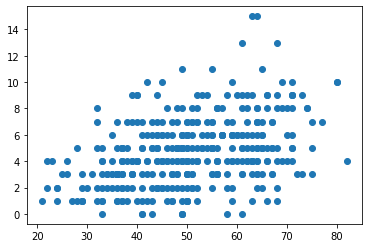

In [194]:
plt.scatter(data['Владение1'], data['Удары в створ1']);

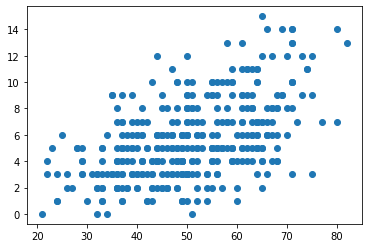

In [197]:
plt.scatter(data['Владение1'], data['Угловые удары1'])